### Schlagwortanalyse.ipynb 

Dieses Notebook findet heraus, wie oft und wo das Wort BVG (in den CSV-Dateien "bvg") in den ausgewälten Medien von 2021–2025 vorkommt

#### 1. Import benötigte Pakete

In [25]:
# Standard
import os
import pandas as pd # Datenanalyse
import sqlite3  # Speicherung in SQLite-Datenbanken

# Bearbeiten von HTML-Dateien
from bs4 import BeautifulSoup  # HTML auslesen und bereinigen
from collections import Counter

# Grafik
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ACHTUNG LOGIK PRÜFEN! Pfade
INPUT_FOLDER = os.path.join("..", "input", "pm_bvg_raw")
OUTPUT_FOLDER = os.path.join("..", "output")

In [3]:
# CSV-Dateien mit Cluster (ausgewählte Medien) einlesen
df_or = pd.read_csv("output/cluster_oeffentlich.csv")
df_wm = pd.read_csv("output/cluster_wirtschaft.csv")
df_gm = pd.read_csv("output/cluster_grossemedien.csv")
df_rm = pd.read_csv("output/cluster_regiomedien.csv")
df_di = pd.read_csv("output/cluster_digital.csv")
df_tech = pd.read_csv("output/cluster_tech.csv")

In [4]:
# Alle df in einem DataFrame vereinen
df_medien = pd.concat([df_or, df_wm, df_gm, df_rm, df_di, df_tech], ignore_index=True)

#### 2. Data Understanding und Prüfung

In [5]:
# Anzahl der Zeilen und Spalten im Datensatz 
df_medien.shape

(46205219, 4)

In [6]:
# Überblick Datentypen
df_medien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46205219 entries, 0 to 46205218
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   count   int64 
 1   word    object
 2   source  object
 3   date    object
dtypes: int64(1), object(3)
memory usage: 1.4+ GB


In [7]:
# Prüfung fehlende Werte
df_medien.isnull().sum()

count        0
word      1860
source       0
date         0
dtype: int64

In [14]:
# Anzahl fehlende Werte nach Medium
df_medien[df_medien["word"].isnull()]["source"].value_counts()

source
sz              273
zeit            182
ntv             175
boerse          169
heise           144
welt            116
stern           101
tagesspiegel     91
taz              83
berliner         79
faz              75
spiegel          65
wiwo             60
dlf              51
mm               51
netzpolitik      44
handelsblatt     41
tagesschau       30
abendblatt       18
dw-de             8
pioneer           4
Name: count, dtype: int64

In [16]:
# Beispiel für fehlende Word
df_medien[df_medien["word"].isnull()].sample(5)

,count,word,source,date
12379955,1,NaN,spiegel,2021-07-21
32411653,1,NaN,abendblatt,2022-12-09
22963461,2,NaN,faz,2023-08-30
29359077,7,NaN,zeit,2025-01-03
29283674,7,NaN,zeit,2024-12-28


In [17]:
# Aus welcher Datei entstehen fehlende Wörter
df_medien[df_medien["word"].isnull()]["filename"].value_counts()

KeyError: 'filename'

In [ ]:
# ENTSCHEIDEN; WAS WIR MIT DEN FEHLENDEN WERTEN MACHEN
#die Logs auswerten (*_log.csv, *_failures.csv)

#gezielt NaN-Wörter untersuchen

#ggf. Medien, Dateien oder Zeiträume identifizieren, die besonders viele Lücken haben

#Entscheidungen treffen, z. B.:

#Ausschließen einzelner Dateien

#Erneut extrahieren/parsen

#Oder bewusst drinlassen und kennzeichnen

#### 3. Schlagwortanalyse

In [18]:
# Neuer DataFrame für Filter: Wie oft kommt BVG in der Webseiten vor
df_bvg = df_medien.loc[df_medien["word"].str.contains("bvg", na=False)]
print(df_bvg.shape)

(2422, 4)


In [19]:
df_bvg["word"].value_counts().head(10)

word
bvg                 1291
bvg:                 195
bvg-bussen            76
bvg-bus               76
bvg.                  65
bvg-app               43
bvg-chefin            35
bvg-streik            35
bvg,                  33
bvg-fahrinfo-app      26
Name: count, dtype: int64

In [ ]:
# Wortanzahl über alle Jahre 
df_bvg["date"] = pd.to_datetime(df_bvg["date"], errors="coerce")
df_bvg["year"] = df_bvg["date"].dt.year
bvg_zeit = df_bvg.groupby("year")["count"].sum()
print(bvg_zeit)

year
2021     646
2022     701
2023     609
2024    1056
2025     357
Name: count, dtype: int64


C:\Users\Marta\AppData\Local\Temp\ipykernel_12048\3224021851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bvg["date"] = pd.to_datetime(df_bvg["date"], errors="coerce")
C:\Users\Marta\AppData\Local\Temp\ipykernel_12048\3224021851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bvg["year"] = df_bvg["date"].dt.year


In [22]:
# Häufigkeit nach Quellen
df_bvg["source"].value_counts()

source
berliner        1127
tagesspiegel    1011
taz               92
netzpolitik       71
ntv               17
zeit              14
heise             13
welt              12
wiwo              11
mm                10
stern             10
spiegel            8
sz                 6
dlf                6
t3n                5
faz                4
handelsblatt       2
abendblatt         2
tagesschau         1
Name: count, dtype: int64

In [ ]:
# Top-Wörter im Zusammenhang mit BVG
df_bvg.groupby("word")["count"].sum().sort_values(ascending=False).head(50)

word
bvg                        2005
bvg:                        226
bvg-bus                      98
bvg-bussen                   82
bvg-app                      72
bvg.                         69
bvg-streik                   62
bvg-chefin                   42
bvg-account                  36
bvg,                         34
bvg-streik:                  32
bvg-fahrinfo-app             26
bvg-busse                    21
bvg?                         20
bvg-warnstreik               19
bvg-fahrgäste                18
bvg-krise                    17
bvg“                         15
bvg-chef                     14
bvg-fahrer                   13
bvg-mitarbeiter              13
bvg-personal                 12
bvg-kantine                  11
bvg-tramfahrer               11
bvg-alltag                   10
bvg-hotline                   9
(bvg)                         9
bvg-chef:                     9
bvg-projekt                   9
bvg-fahrgäste:                9
bvg-streit:                   8
bvg

In [23]:
pivot = df_bvg.pivot_table(index="year", columns="source", values="count", aggfunc="sum", fill_value=0)
pivot.head()

source,abendblatt,berliner,dlf,faz,handelsblatt,heise,mm,netzpolitik,ntv,spiegel,stern,sz,t3n,tagesschau,tagesspiegel,taz,welt,wiwo,zeit
year,,,,,,,,,,,,,,,,,,,
2021,0,115,5,1,2,2,0,0,0,0,3,0,0,0,497,7,0,13,1
2022,0,181,0,3,0,0,0,0,2,5,1,0,0,0,493,14,1,0,1
2023,2,359,0,0,0,3,9,0,2,0,2,2,6,0,187,31,1,0,5
2024,0,580,1,1,0,6,1,115,5,2,2,2,0,0,289,43,5,0,4
2025,0,210,0,0,0,2,0,0,9,1,2,2,0,1,105,16,6,0,3


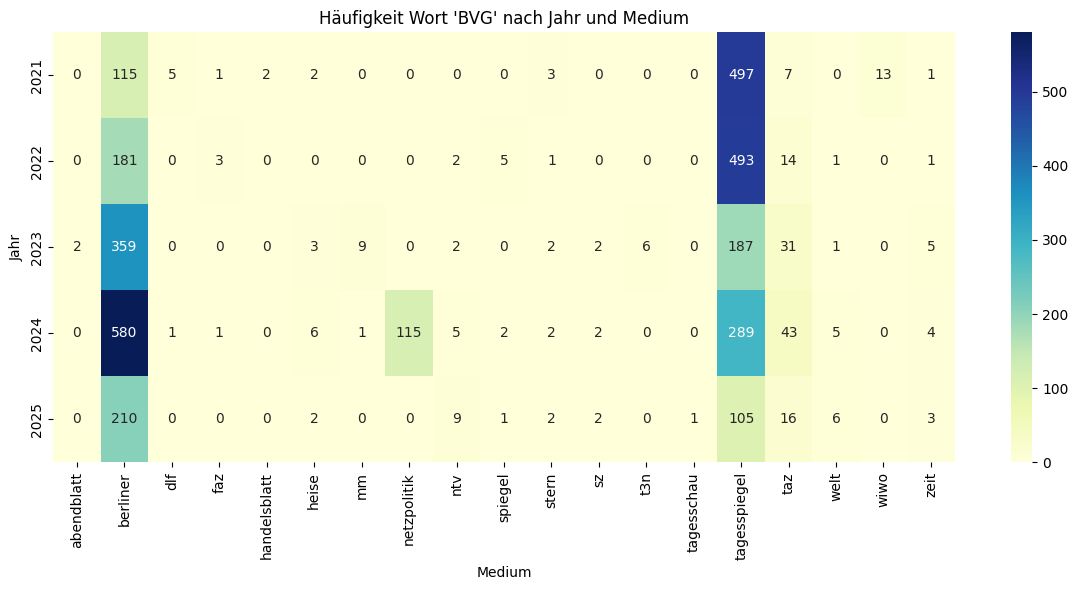

In [29]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Häufigkeit Wort 'BVG' nach Jahr und Medium")
plt.xlabel("Medium")
plt.ylabel("Jahr")
plt.tight_layout()
plt.show()